<h1>Klasifikasi Gambar</h1>

<p>
  <!-- Typing SVG by DenverCoder1 - https://github.com/DenverCoder1/readme-typing-svg -->
<a href="https://git.io/typing-svg"><img src="https://readme-typing-svg.demolab.com?font=Jetbrains+Mono&pause=800&color=71BCE1&center=false&vCenter=false&width=400&lines=Proyek+Akhir:+Klasifikasi+Gambar;Ahmad+Rizki" alt="Typing SVG" /></a>
</p>

## Author
- Nama: Ahmad Rizki
- Email: 18221071@std.stei.itb.ac.id
- Asal: Palu, Sulawesi Tengah

### Teknik yang tidak diajarkan pada di modul
- Penggunaan callbacks untuk menyimpan model
- Penggunaan shutil untuk mengelola file
- Pengunaan Model.evaluate untuk mengevaluasi model
- Pengunaan library rembg untuk menghapus background gambar
- dll.

### Kelemahan dari model yang dibuat
- Memakan proses yang cukup lama saat proses penghapusan background gambar (*kriteria dari submission hanya mengatakan, "Proses pelatihan model Anda memakan waktu lebih dari 30 menit.", penghapusan background tidak termasuk dalam proses pelatihan model, namun masuk kedalam proses data preparation*)
- Saya sendiri mengerjakan proyek ini pada local, dikarenakan proses penghapusan background di google colab memakan waktu yang cukup lama.

### Import Library and Get Dataset

In [1]:
# import library yang dibutuhkan
import tensorflow as tf
from sklearn.model_selection import train_test_split
import shutil
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
import cv2
from rembg.bg import remove
import easygui
from PIL import Image
from concurrent.futures import ProcessPoolExecutor
import wget

print(tf.__version__)

2.14.0


In [4]:
# mengunduh dataset tersebut dengan menggunakan perintah berikut.
# !wget --no-check-certificate \
#   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

# download dataset dari github
# url = ' https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
# path = './tmp/'
# filename = 'rockpaperscissors.zip'
# fileZip = wget.download(url, out=path+filename)

### Data Preprocessing

In [5]:
# melakukan ekstraksi pada file zip, jika diretori train dan validation sudah ada isinya maka tidak perlu di ekstrak lagi

# Cek apakah direktori sudah ada isinya atau belum
if os.path.exists('../tmp/processed_rockpaperscissors/train') and os.path.exists('./tmp/processed_rockpaperscissors/val'):
    print('Direktori sudah ada isinya')
else:
    local_zip = './tmp/rockpaperscissors.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp')
    zip_ref.close()

In [6]:
import os
from rembg import remove
from PIL import Image

def remove_background(input_path, output_path):
    try:
        input_image = Image.open(input_path)
        output_image = remove(input_image)
        output_image.save(output_path)
    except Exception as e:
        with open("error_log.txt", "a") as log_file:
            log_file.write(f"Error processing {input_path}: {e}\n")

def remove_background_serial(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        remove_background(input_path, output_path)

# Use serial processing for background removal
original_dataset_dir = './tmp/rockpaperscissors'  # Replace with your dataset directory
processed_dataset_dir = './tmp/processed_rockpaperscissors'
categories = ['rock', 'paper', 'scissors']

if not os.path.exists('./tmp/processed_rockpaperscissors'):
    for category in categories:
        input_dir = os.path.join(original_dataset_dir, category)
        output_dir = os.path.join(processed_dataset_dir, category)
        remove_background_serial(input_dir, output_dir)

In [7]:
# membuat direktori untuk data training dan data validasi
base_dir = './tmp/processed_rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori untuk data training 
train_rock_dir = os.path.join(train_dir, 'rock') 
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori untuk data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# membuat direktori untuk data training dan data validasi
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

if not os.path.exists(train_rock_dir):
    os.mkdir(train_rock_dir)
if not os.path.exists(train_paper_dir):
    os.mkdir(train_paper_dir)
if not os.path.exists(train_scissors_dir):
    os.mkdir(train_scissors_dir)

if not os.path.exists(validation_rock_dir):
    os.mkdir(validation_rock_dir)
if not os.path.exists(validation_paper_dir):
    os.mkdir(validation_paper_dir)
if not os.path.exists(validation_scissors_dir):
    os.mkdir(validation_scissors_dir)

In [8]:
# membagi data train dan data validation dengan perbandingan 60:40 

# Train test split jika direktori belum ada isinya
if len(os.listdir('./tmp/processed_rockpaperscissors/train/rock')) == 0 and len(os.listdir('./tmp/processed_rockpaperscissors/train/scissors')) == 0 and len(os.listdir('./tmp/processed_rockpaperscissors/train/paper')) == 0:
    # rock
    train_rock = os.listdir('./tmp/processed_rockpaperscissors/rock')
    validation_rock = os.listdir('./tmp/processed_rockpaperscissors/rock')
    train_rock, validation_rock = train_test_split(train_rock, test_size = 0.4, random_state=None)

    # paper
    train_paper = os.listdir('./tmp/processed_rockpaperscissors/paper')
    validation_paper = os.listdir('./tmp/processed_rockpaperscissors/paper')
    train_paper, validation_paper = train_test_split(train_paper, test_size = 0.4, random_state=None)

    # scissors
    train_scissors = os.listdir('./tmp/processed_rockpaperscissors/scissors')
    validation_scissors = os.listdir('./tmp/processed_rockpaperscissors/scissors')
    train_scissors, validation_scissors = train_test_split(train_scissors, test_size = 0.4, random_state=None)

    # Memindahkan file gambar ke direktori data training (train)
    for image in train_rock:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/rock', image), os.path.join(train_rock_dir, image))
    for image in train_paper:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/paper', image), os.path.join(train_paper_dir, image))
    for image in train_scissors:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/scissors', image), os.path.join(train_scissors_dir, image))

    # Memindahkan file gambar ke direktori data validasi (validation)
    for image in validation_rock:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/rock', image), os.path.join(validation_rock_dir, image))
    for image in validation_paper:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/paper', image), os.path.join(validation_paper_dir, image))
    for image in validation_scissors:
        shutil.move(os.path.join('./tmp/processed_rockpaperscissors/scissors', image), os.path.join(validation_scissors_dir, image))
else:
    print('Direktori sudah ada isinya')

Direktori sudah ada isinya


In [9]:
# menampilkan nama kelas yang ada pada train
os.listdir('./tmp/processed_rockpaperscissors/train')

['paper', 'rock', 'scissors']

In [10]:
# menampilkan nama kelas yang ada pada val
os.listdir('./tmp/processed_rockpaperscissors/val')

['paper', 'rock', 'scissors']

### Data Modelling

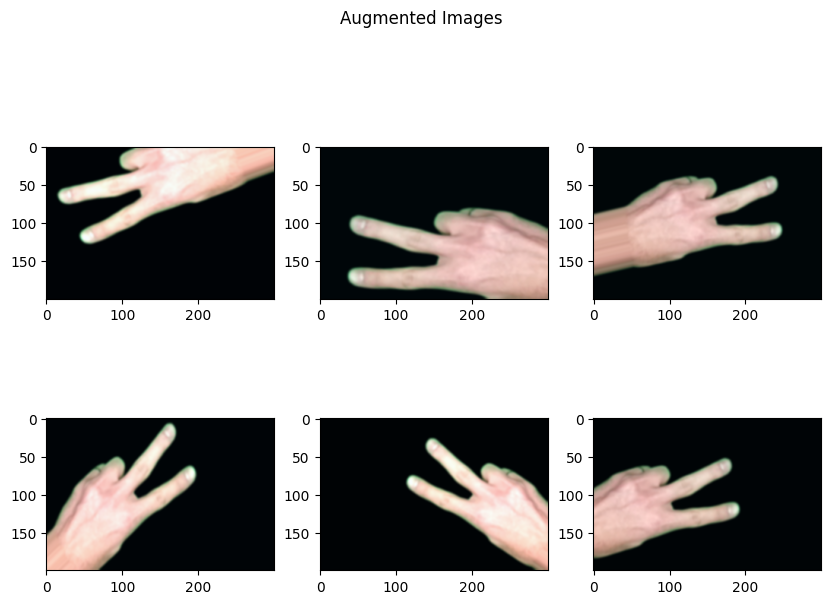

In [11]:

# Preprocessing image
def preprocess_img(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = tf.image.adjust_contrast(img, 2)
    return img

# Image Data Generator untuk data training (Augmentasi data)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    preprocessing_function=preprocess_img,
    brightness_range=[0.5, 1.5],
)

# Load an image for augmentation
img_path = './tmp/processed_rockpaperscissors/train/scissors/KngvagTrRurJUlI5.png'
img = tf.keras.preprocessing.image.load_img(img_path)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate 6 augmented images
plt.figure(figsize=(10, 10))
plt.suptitle('Augmented Images')

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(keras_image.array_to_img(batch[0]))  # Adjusted the reference to array_to_img
    i += 1
    if i >= 6:
        break

plt.show()

# Image Data Generator untuk data validation
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
# menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model

# data training
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # batch_size merupakan jumlah sampel yang akan dikirimkan ke model dalam sekali proses iterasi.
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

# data validation
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# membuat arsitektur CNN

# membuat model sequential
model = tf.keras.models.Sequential([
    # layer konvolusi pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # layer max pooling pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    # layer konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # layer max pooling kedua
    tf.keras.layers.MaxPooling2D(2,2),
    # layer konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # layer max pooling ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    # layer konvolusi keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # layer max pooling keempat
    tf.keras.layers.MaxPooling2D(2,2),
    # layer flatten
    tf.keras.layers.Flatten(),
    # layer dropout
    tf.keras.layers.Dropout(0.5), # droupout untuk mengurangi overfitting
    # layer hidden layer pertama
    tf.keras.layers.Dense(512, activation='relu'),
    # layer output
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
# summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
# memilih optimizer dan loss function

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [16]:
# menggunakan callback

callbacks = [
    # menghentikan training ketika akurasi tidak mengalami peningkatan setelah beberapa epoch
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', # monitoring nilai akurasi pada data validasi
        patience=6, # menghentikan training ketika akurasi model tidak meningkat setelah 6 epoch
        mode='max', # melihat perubahan maksimal
        verbose=1 # menampilkan pesan ketika callback dipanggil
    ),
    # menyimpan model ketika akurasi model lebih tinggi dari sebelumnya, tetapi tidak menyimpan model yang overfitting
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5', # menentukan nama file model yang disimpan
        monitor='val_accuracy', # monitoring nilai akurasi pada data validasi
        save_best_only=True, # menyimpan model terbaik
        verbose=1 # menampilkan pesan ketika callback dipanggil
    ),
]

In [17]:
# melatih model dengan model.fit

history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=callbacks
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.50625, saving model to best_model.h5
25/25 - 20s - loss: 1.1330 - accuracy: 0.3462 - val_loss: 1.0647 - val_accuracy: 0.5063 - 20s/epoch - 784ms/step
Epoch 2/20


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.50625 to 0.92500, saving model to best_model.h5
25/25 - 16s - loss: 0.9812 - accuracy: 0.5337 - val_loss: 0.6111 - val_accuracy: 0.9250 - 16s/epoch - 648ms/step
Epoch 3/20

Epoch 3: val_accuracy did not improve from 0.92500
25/25 - 15s - loss: 0.7408 - accuracy: 0.6787 - val_loss: 0.5326 - val_accuracy: 0.7688 - 15s/epoch - 615ms/step
Epoch 4/20

Epoch 4: val_accuracy did not improve from 0.92500
25/25 - 15s - loss: 0.6928 - accuracy: 0.7150 - val_loss: 0.3923 - val_accuracy: 0.9250 - 15s/epoch - 598ms/step
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.92500
25/25 - 17s - loss: 0.5716 - accuracy: 0.7825 - val_loss: 0.3731 - val_accuracy: 0.7875 - 17s/epoch - 678ms/step
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.92500
25/25 - 16s - loss: 0.4918 - accuracy: 0.8100 - val_loss: 0.3683 - val_accuracy: 0.8188 - 16s/epoch - 646ms/step
Epoch 7/20

Epoch 7: val_accuracy improved from 0.92500 to 0.94375, saving model to best_model.h

### Model Evaluation

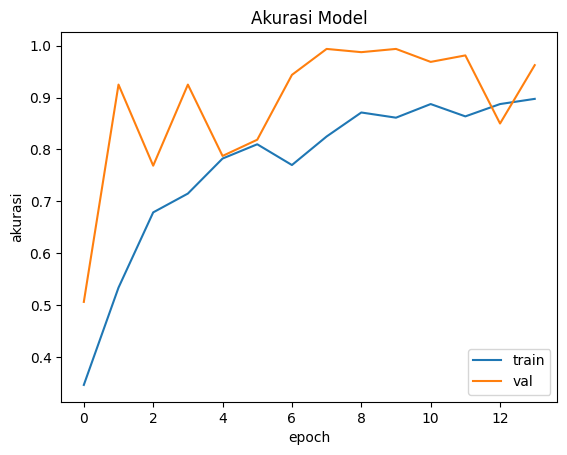

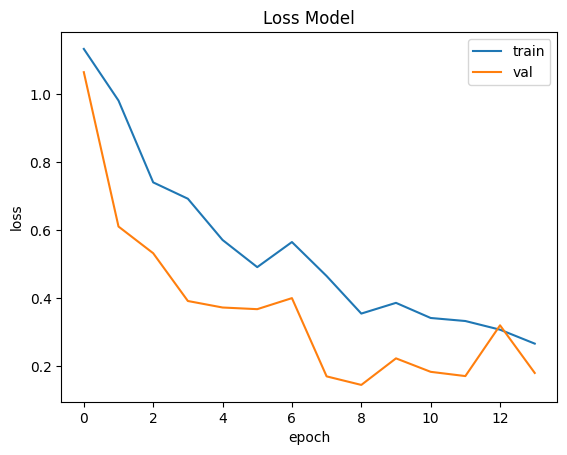

In [18]:
# menampilkan akurasi dan loss dari model

# plot akurasi model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# plot loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [19]:
# Confusion Matrix

# membuat fungsi untuk plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Fungsi ini mencetak dan menggambar confusion matrix.
    Normalisasi dapat diterapkan dengan mengatur `normalize = True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix yang dinormalisasi")
    else:
        print('Confusion matrix, tanpa normalisasi')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]): # baris
        for j in range(cm.shape[1]): # kolom
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout() # mengatur layout agar tidak tumpang tindih
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
# melakukan evaluasi model terhadap data validation

# load best model
path = './best_model.h5'
best_model = tf.keras.models.load_model(path)

# evaluasi model
scores = best_model.evaluate(validation_generator, verbose=1)
print("Akurasi: %0.2f%%" % (scores[1]*100))
print("Loss: %0.2f%%" % (scores[0]*100))

28/28 [==============================] - 3s 96ms/step - loss: 0.1798 - accuracy: 0.9886
Akurasi: 98.86%
Loss: 17.98%


### Predict Image

1/1 [==============================] - 0s 86ms/step
[[0. 0. 1.]]
hasil prediksi: scissors


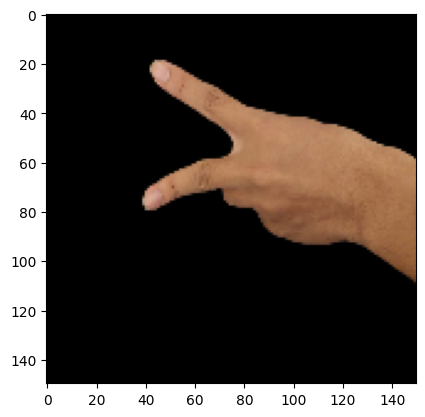

In [21]:
# melakukan prediksi dengan 'best_model.h5'

# load best model
path = './best_model.h5'
best_model = tf.keras.models.load_model(path)

# memprediksi gambar menggunakan best model
file_path = './test/gunting.jpg'
output_file_name = file_path.split('/')[-1].split('.')[0] + '_processed.png'
output_file_path = os.path.join('./test/processed_test', output_file_name)

# remove background
remove_background(file_path, output_file_path)

# load gambar
img = keras_image.load_img(output_file_path, target_size=(150, 150))

# ubah menjadi array
x = keras_image.img_to_array(img)
# ubah menjadi 4 dimensi
x = np.expand_dims(x, axis=0)

# prediksi gambar
images = np.vstack([x])
classes = best_model.predict(images, batch_size=10)

# menampilkan gambar
plt.imshow(img)

# menampilkan hasil prediksi
print(classes)

# menampilkan hasil prediksi
if classes[0][0] == 1:
    print('hasil prediksi: paper')
elif classes[0][1] == 1:
    print('hasil prediksi: rock')
elif classes[0][2] == 1:
    print('hasil prediksi: scissors')
else:
    print('tidak dapat memprediksi')